<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>

Clustering with scikit-learn

<br><br></p>

The aim is to learn how to perform k-means clustering using scikit-learn in Python.

I have used cluster analysis to generate a big picture model of the weather at a local station using a minute-graunlarity data. 

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
import utils
from itertools import cycle,islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
%matplotlib inline

# Ingest data from csv file in pandas dataframe

In [2]:
weather=pd.read_csv('C:\\Users\\user\\Downloads\\Week-7-MachineLearning\\Week-7-MachineLearning\\weather\\minute_weather.csv')

In [3]:
weather.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [4]:
weather.shape

(1587257, 13)

# Data Sampling

Data has more rows so we will take every 10th row.

In [5]:
sampled_data=weather[(weather['rowID']%10)==0]

sampled_data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
10,10,2011-09-10 00:10:49,912.3,62.24,144.0,1.2,167.0,1.8,115.0,0.6,0.0,0.0,38.5
20,20,2011-09-10 00:20:49,912.2,63.32,100.0,2.0,122.0,2.5,91.0,1.5,0.0,0.0,58.3
30,30,2011-09-10 00:30:49,912.2,62.60,91.0,2.0,103.0,2.4,71.0,1.4,0.0,0.0,57.9
40,40,2011-09-10 00:40:49,912.2,64.04,81.0,2.6,88.0,2.9,68.0,1.4,0.0,0.0,57.4


In [6]:
sampled_data.shape

(158726, 13)

In [7]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158726 entries, 0 to 1587250
Data columns (total 13 columns):
rowID                 158726 non-null int64
hpwren_timestamp      158726 non-null object
air_pressure          158726 non-null float64
air_temp              158726 non-null float64
avg_wind_direction    158680 non-null float64
avg_wind_speed        158680 non-null float64
max_wind_direction    158680 non-null float64
max_wind_speed        158680 non-null float64
min_wind_direction    158680 non-null float64
min_wind_speed        158680 non-null float64
rain_accumulation     158725 non-null float64
rain_duration         158725 non-null float64
relative_humidity     158726 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 17.0+ MB


In [8]:
sampled_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937510,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [9]:
sampled_data.isnull().any()

rowID                 False
hpwren_timestamp      False
air_pressure          False
air_temp              False
avg_wind_direction     True
avg_wind_speed         True
max_wind_direction     True
max_wind_speed         True
min_wind_direction     True
min_wind_speed         True
rain_accumulation      True
rain_duration          True
relative_humidity     False
dtype: bool

In [10]:
sampled_data=sampled_data.dropna()

In [11]:
sampled_data.isnull().any()

rowID                 False
hpwren_timestamp      False
air_pressure          False
air_temp              False
avg_wind_direction    False
avg_wind_speed        False
max_wind_direction    False
max_wind_speed        False
min_wind_direction    False
min_wind_speed        False
rain_accumulation     False
rain_duration         False
relative_humidity     False
dtype: bool

# Delete Columns with null values

In [12]:
del sampled_data['rain_accumulation']
del sampled_data['rain_duration']

In [13]:
sampled_data.shape

(158679, 11)

# Select features necessary for clustering

In [14]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [15]:
select_data = sampled_data[features]

In [16]:
select_data.head(10)

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4
50,912.1,63.68,102.0,1.2,119.0,1.5,51.4
60,912.0,64.04,83.0,0.7,101.0,0.9,51.4
70,911.9,64.22,82.0,2.0,97.0,2.4,62.2
80,911.9,61.70,67.0,3.3,70.0,3.5,71.5
90,911.9,61.34,67.0,3.6,75.0,4.2,72.5
100,911.8,62.96,95.0,2.3,106.0,2.5,63.9


# Scale the features using standardscaler

In [17]:
X = StandardScaler().fit_transform(select_data)
X

array([[-1.48457779,  0.03247287, -0.1905634 , ...,  0.03826302,
        -0.66172102, -0.34710411],
       [-1.51734678,  0.1237468 , -0.65236961, ..., -0.44847591,
        -0.372321  ,  0.40839584],
       [-1.51734678,  0.06289752, -0.74682997, ..., -0.6539879 ,
        -0.41366386,  0.39313322],
       ...,
       [-0.30489432,  1.15818466,  1.90855574, ...,  2.03930084,
        -0.70306388,  0.01538324],
       [-0.30489432,  1.12776002,  2.06598967, ..., -1.67073143,
        -0.74440674, -0.04948292],
       [-0.30489432,  1.09733538, -1.6389556 , ..., -1.55175081,
        -0.62037816, -0.05711423]])

# Use KMeans clustering

In [18]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


# Find the centers of 12 clusters 

In [19]:
centers = model.cluster_centers_
centers

array([[-1.18292094, -0.87297779,  0.44686131,  1.98160556,  0.53849959,
         1.94283934,  0.91085825],
       [ 0.72764423,  0.43814247,  0.28622311, -0.53486404,  0.47387612,
        -0.54104939, -0.77066481],
       [-0.69794852,  0.54048292,  0.17668223, -0.58405502,  0.34607096,
        -0.59749817, -0.11226785],
       [-0.21146043,  0.63313736,  0.4085818 ,  0.73445949,  0.51673134,
         0.67249092, -0.15081426],
       [ 0.0605948 , -0.78888177, -1.19686693, -0.57084064, -1.04294426,
        -0.58542373,  0.87846261],
       [ 0.13099305,  0.84305014,  1.41137114, -0.6386865 ,  1.67551128,
        -0.58947633, -0.713932  ],
       [-0.16403726,  0.86393141, -1.31102888, -0.58989159, -1.16671214,
        -0.60520579, -0.6409327 ],
       [ 1.19051525, -0.25512359, -1.1549587 ,  2.1236234 , -1.05349068,
         2.24037131, -1.13452583],
       [ 0.24635022, -0.99524088,  0.65839836, -0.54729956,  0.84924647,
        -0.53006382,  1.16072895],
       [ 0.23405375,  0.3193

# Plot

In [20]:

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [21]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [22]:
P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,-1.182921,-0.872978,0.446861,1.981606,0.538500,1.942839,0.910858,0
1,0.727644,0.438142,0.286223,-0.534864,0.473876,-0.541049,-0.770665,1
2,-0.697949,0.540483,0.176682,-0.584055,0.346071,-0.597498,-0.112268,2
3,-0.211460,0.633137,0.408582,0.734459,0.516731,0.672491,-0.150814,3
4,0.060595,-0.788882,-1.196867,-0.570841,-1.042944,-0.585424,0.878463,4
5,0.130993,0.843050,1.411371,-0.638687,1.675511,-0.589476,-0.713932,5
6,-0.164037,0.863931,-1.311029,-0.589892,-1.166712,-0.605206,-0.640933,6
7,1.190515,-0.255124,-1.154959,2.123623,-1.053491,2.240371,-1.134526,7
8,0.246350,-0.995241,0.658398,-0.547300,0.849246,-0.530064,1.160729,8
9,0.234054,0.319342,1.887924,-0.651903,-1.551734,-0.576749,-0.282738,9


# Dry days

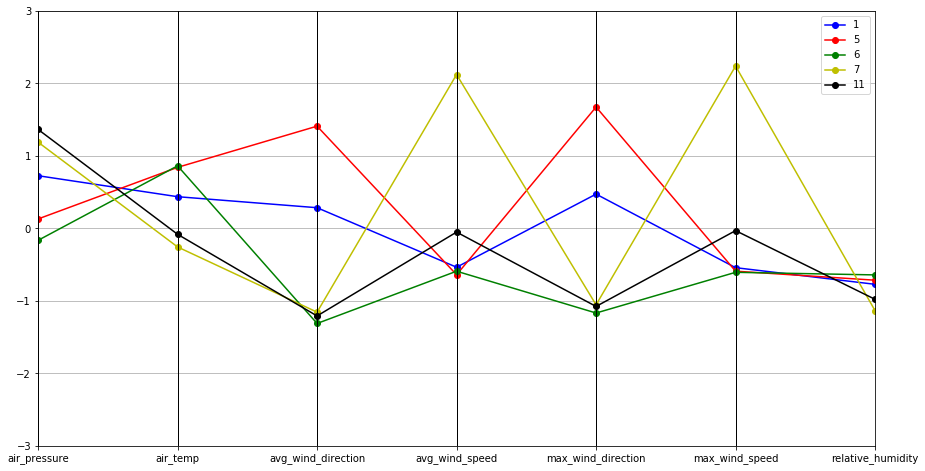

In [23]:
parallel_plot(P[P['relative_humidity'] < -0.5])

# Warm days

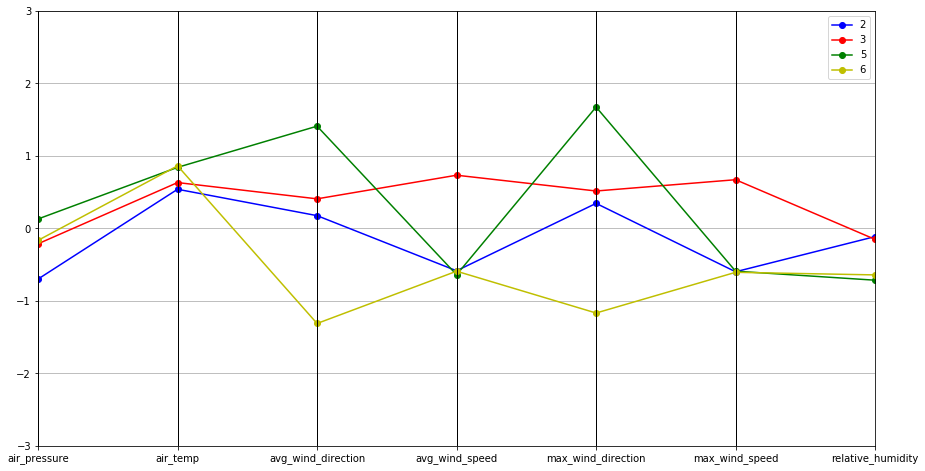

In [24]:
parallel_plot(P[P['air_temp'] > 0.5])

# Cool days

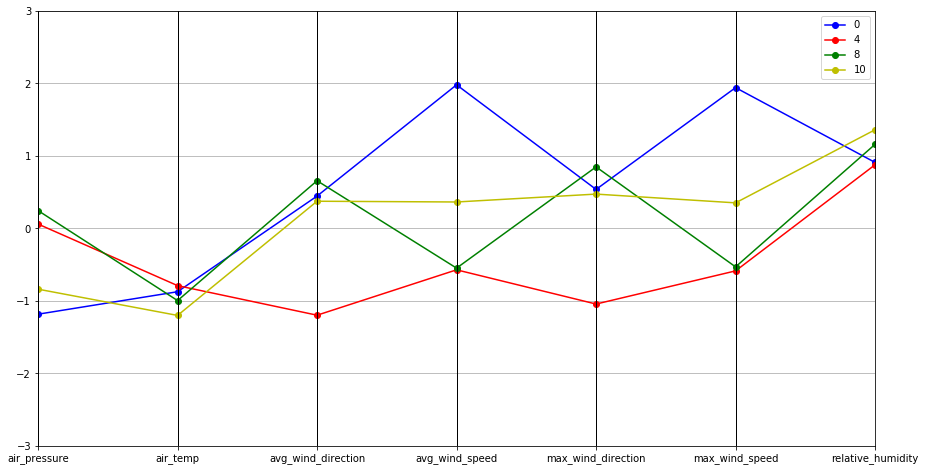

In [25]:
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])
